In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from statannotations.Annotator import Annotator
import pingouin as pg


startNbUser = 1
nbUsers = 15
nbBloc = 1


allData = pd.DataFrame()
nameList = []

for i in range(startNbUser, startNbUser + nbUsers):
    nameList.append("User"+str(i))
    
tasks = ['Squeeze', 'Compress']
scales = ['Large', 'Small']
objects = ['Cube']

stiffness = None
range_0 = np.arange(45, 66, 2)
range_1 = np.arange(10, 25, 2)
range_2 = np.arange(1, 10, 5)
range_3 = np.arange(70, 76, 5)
range_4 = np.arange(25, 45, 5)

stiffness = np.append(range_0, range_1)
stiffness = np.append(stiffness, range_2)
stiffness = np.append(stiffness, range_3)
stiffness = np.append(stiffness, range_4)

    
allData = pd.read_csv('DataToAnova.csv')
allData

,Unnamed: 0,User,Task,Stiffness,Scale,2AFC,Confidence,Results
0,0,User15,Squeeze,45.0,Large,1.0,2,4.0
1,1,User15,Compress,45.0,Large,1.0,3,4.0
2,2,User15,Squeeze,45.0,Small,0.0,4,-4.0
3,3,User15,Compress,45.0,Small,0.0,3,-4.0
4,4,User15,Squeeze,47.0,Large,1.0,4,4.0
...,...,...,...,...,...,...,...,...
1615,103,User1,Compress,35.0,Small,0.0,3,-4.0
1616,104,User1,Squeeze,40.0,Large,1.0,4,4.0
1617,105,User1,Compress,40.0,Large,1.0,4,4.0
1618,106,User1,Squeeze,40.0,Small,1.0,3,4.0


In [3]:
allData[:20]

,Unnamed: 0,User,Task,Stiffness,Scale,2AFC,Confidence,Results
0,0,User15,Squeeze,45.0,Large,1.0,2,4.0
1,1,User15,Compress,45.0,Large,1.0,3,4.0
2,2,User15,Squeeze,45.0,Small,0.0,4,-4.0
3,3,User15,Compress,45.0,Small,0.0,3,-4.0
4,4,User15,Squeeze,47.0,Large,1.0,4,4.0
5,5,User15,Compress,47.0,Large,1.0,2,4.0
6,6,User15,Squeeze,47.0,Small,0.0,3,-4.0
7,7,User15,Compress,47.0,Small,0.0,4,-4.0
8,8,User15,Squeeze,49.0,Large,1.0,4,4.0
9,9,User15,Compress,49.0,Large,0.0,4,-4.0


In [4]:
allData[-20:]

,Unnamed: 0,User,Task,Stiffness,Scale,2AFC,Confidence,Results
1600,88,User1,Squeeze,75.0,Large,1.0,5,4.0
1601,89,User1,Compress,75.0,Large,1.0,4,4.0
1602,90,User1,Squeeze,75.0,Small,1.0,5,4.0
1603,91,User1,Compress,75.0,Small,1.0,5,4.0
1604,92,User1,Squeeze,25.0,Large,1.0,4,4.0
1605,93,User1,Compress,25.0,Large,1.0,4,4.0
1606,94,User1,Squeeze,25.0,Small,1.0,4,4.0
1607,95,User1,Compress,25.0,Small,1.0,3,4.0
1608,96,User1,Squeeze,30.0,Large,1.0,3,4.0
1609,97,User1,Compress,30.0,Large,1.0,3,4.0


In [7]:
# Start anova!
anovaMeUp = pd.DataFrame()

for i in range(0, len(scales)):
    for j in range(0, len(allData[allData['Scale'] == str(scales[i])]['Results'])):
        cond0 = allData['Scale'] == str(scales[i])
        anovaMeUp.loc[j, scales[i]] = allData[cond0]['Results'].iloc[j]
        anovaMeUp.loc[j, 'Stiffness'] = allData[cond0]['Stiffness'].iloc[j]
        anovaMeUp.loc[j, 'Task'] = allData[cond0]['Task'].iloc[j]
        anovaMeUp.loc[j, 'User'] = allData[cond0]['User'].iloc[j]


anovaMeUp.head()

,Large,Stiffness,Task,User,Small
0,4.0,45.0,Squeeze,User15,-4.0
1,4.0,45.0,Compress,User15,-4.0
2,4.0,47.0,Squeeze,User15,-4.0
3,4.0,47.0,Compress,User15,-4.0
4,4.0,49.0,Squeeze,User15,-4.0


In [8]:
len(anovaMeUp) #nbParticipants x nbConditions x nbBloc
#anovaMeUp.tail()

810

In [9]:
tasks

['Squeeze', 'Compress']

In [20]:

anovaMe_melt = pd.melt(anovaMeUp, id_vars=['Stiffness', 'Task', 'User'], value_vars=scales)
# replace column names
anovaMe_melt.columns = ['Conditions', 'Task', 'User', 'Scale', 'Results']

anovaMe_melt.to_csv('anovaMeBloc.csv')
anovaMe_melt.head()
# output


,Conditions,Task,User,Scale,Results
0,45.0,Squeeze,User15,Large,4.0
1,45.0,Compress,User15,Large,4.0
2,47.0,Squeeze,User15,Large,4.0
3,47.0,Compress,User15,Large,4.0
4,49.0,Squeeze,User15,Large,4.0


In [21]:
len(anovaMe_melt)


1620

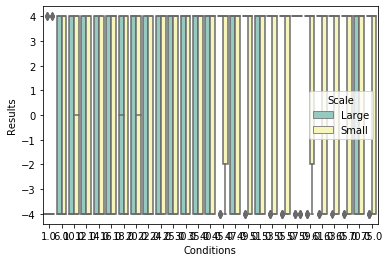

In [22]:
sns.boxplot(x="Conditions", y="Results", hue = 'Scale', data=anovaMe_melt, palette="Set3") 
    

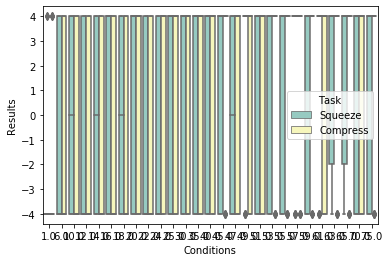

In [23]:

sns.boxplot(x="Conditions", y="Results", hue = 'Task', data=anovaMe_melt, palette="Set3") 
    

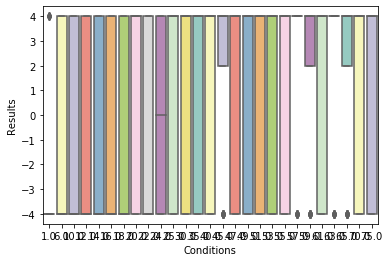

In [24]:
sns.boxplot(x="Conditions", y="Results", data=anovaMe_melt, palette="Set3") 


In [62]:

aov = pg.rm_anova(dv='Results', within=['Task', 'Scale'], 
                   subject='User', data=anovaMe_melt, detailed = True, effsize = "n2")
print(aov)

         Source        SS  ddof1  ddof2        MS         F     p-unc  \
0          Task  0.842798      1     14  0.842798  1.015106  0.330780   
1         Scale  2.112849      1     14  2.112849  2.018371  0.177294   
2  Task * Scale  1.691449      1     14  1.691449  2.047571  0.174391   

   p-GG-corr        n2  eps  
0   0.330780  0.019835  1.0  
1   0.177294  0.049725  1.0  
2   0.174391  0.039807  1.0  


In [73]:
posthocs = pg.pairwise_ttests(dv='Results', within=['Task', 'Scale'],
                                  subject='User', data=anovaMe_melt, alpha = 0.05, marginal = True, padjust = 'bonf')



In [75]:
posthocs

,Contrast,Scale,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,Scale,-,Large,Small,True,True,1.420694,14.0,two-sided,0.177294,NaN,NaN,0.606,0.197679
1,Task,-,Compress,Squeeze,True,True,1.007525,14.0,two-sided,0.330780,NaN,NaN,0.405,0.125852
2,Scale * Task,Large,Compress,Squeeze,True,True,2.311299,14.0,two-sided,0.036558,0.073116,bonf,1.961,0.306693
3,Scale * Task,Small,Compress,Squeeze,True,True,-0.247364,14.0,two-sided,0.808218,1.000000,bonf,0.27,-0.046073


In [74]:
posthocs = pg.pairwise_ttests(dv='Results', within=['Scale', 'Task'],
                                  subject='User', data=anovaMe_melt, alpha = 0.05, marginal = True, padjust = 'bonf')



In [71]:
posthocs

,Contrast,Task,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,Task,-,Compress,Squeeze,True,True,1.007525,14.0,two-sided,0.330780,NaN,NaN,0.405,0.125852
1,Scale,-,Large,Small,True,True,1.420694,14.0,two-sided,0.177294,NaN,NaN,0.606,0.197679
2,Task * Scale,Compress,Large,Small,True,True,1.658792,14.0,two-sided,0.119384,0.238769,bonf,0.801,0.336364
3,Task * Scale,Squeeze,Large,Small,True,True,0.153846,14.0,two-sided,0.879927,1.000000,bonf,0.265,0.020780


In [76]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
model = ols('Results ~ C(Scale) * C(Task) * C(User)', data=anovaMe_melt).fit()
    
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table
# output


,sum_sq,df,F,PR(>F)
C(Scale),57.046914,1.0,4.643087,3.133152e-02
C(Task),22.755556,1.0,1.852090,1.737371e-01
C(User),4763.812346,14.0,27.694993,1.315943e-65
C(Scale):C(Task),45.669136,1.0,3.717042,5.404104e-02
C(Scale):C(User),395.693827,14.0,2.300413,4.005851e-03
C(Task):C(User),313.837037,14.0,1.824529,3.051890e-02
C(Scale):C(Task):C(User),312.256790,14.0,1.815342,3.165723e-02
Residual,19166.814815,1560.0,NaN,NaN


In [77]:
anovaMe_melt.head()

,Conditions,Task,User,Scale,Results
0,45.0,Squeeze,User15,Large,4.0
1,45.0,Compress,User15,Large,4.0
2,47.0,Squeeze,User15,Large,4.0
3,47.0,Compress,User15,Large,4.0
4,49.0,Squeeze,User15,Large,4.0


In [81]:
summaryCrossRef = pd.DataFrame()

posthocs = pg.pairwise_ttests(dv='Results', within=['Scale', 'Task'], alpha = 0.05, interaction = True,
                   subject='User', data=anovaMe_melt, padjust = 'bonf')
summaryCrossRef = posthocs#[posthocs['Contrast'] == 'Conditions * Obj']
posthocs = pg.pairwise_ttests(dv='Results', within=['Task', 'Scale'], alpha = 0.05, interaction = True,
                   subject='User', data=anovaMe_melt, padjust = 'bonf')
summaryCrossRef = pd.concat([posthocs[posthocs['Contrast'] == 'Task * Scale'], summaryCrossRef], axis = 0)


summaryCrossRef.index = np.arange(0, len(summaryCrossRef))
for i in range(0, len(summaryCrossRef)):
    if((summaryCrossRef['p-corr'].iloc[i] < 0.05) & (summaryCrossRef['p-corr'].iloc[i] > 0.01)):
        summaryCrossRef.loc[summaryCrossRef['p-corr'].index[i], 'Stars'] = '*'
    if((summaryCrossRef['p-corr'].iloc[i] < 0.01) & (summaryCrossRef['p-corr'].iloc[i] > 0.001)):
        summaryCrossRef.loc[summaryCrossRef['p-corr'].index[i], 'Stars'] = '**'
    if((summaryCrossRef['p-corr'].iloc[i] < 0.001) & (summaryCrossRef['p-corr'].iloc[i] > 0.0001)):
        summaryCrossRef.loc[summaryCrossRef['p-corr'].index[i], 'Stars'] = '***'
    elif(summaryCrossRef['p-corr'].iloc[i] < 0.0001):
        summaryCrossRef.loc[summaryCrossRef['p-corr'].index[i], 'Stars'] = '****'
    else:
        pass
    
summaryCrossRef = summaryCrossRef[summaryCrossRef['Contrast'].isna() == False]

#summaryCrossRef = summaryCrossRef[summaryCrossRef['Stars'].isna() == False]

# Effect on Scales/Tasks on Perception

In [82]:
#summaryCrossRef.to_excel('../Jupyter/Results/Signficant_All.xlsx')

summaryCrossRef

,Contrast,Task,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges,Scale
0,Task * Scale,Compress,Large,Small,True,True,1.658792,14.0,two-sided,0.119384,0.238769,bonf,0.801,0.336364,NaN
1,Task * Scale,Squeeze,Large,Small,True,True,0.153846,14.0,two-sided,0.879927,1.000000,bonf,0.265,0.020780,NaN
2,Scale,NaN,Large,Small,True,True,1.420694,14.0,two-sided,0.177294,NaN,NaN,0.606,0.197679,-
3,Task,NaN,Compress,Squeeze,True,True,1.007525,14.0,two-sided,0.330780,NaN,NaN,0.405,0.125852,-
4,Scale * Task,NaN,Compress,Squeeze,True,True,2.311299,14.0,two-sided,0.036558,0.073116,bonf,1.961,0.306693,Large
5,Scale * Task,NaN,Compress,Squeeze,True,True,-0.247364,14.0,two-sided,0.808218,1.000000,bonf,0.27,-0.046073,Small


In [83]:
from bioinfokit.analys import stat
res = stat()
res.anova_stat(df=anovaMe_melt, res_var='Results', anova_model='Results ~ C(Conditions) * C(Scale) * C(Task)')

res.anova_summary
# output

,df,sum_sq,mean_sq,F,PR(>F)
C(Conditions),26.0,2387.753086,91.836657,6.326714,9.289078e-21
C(Scale),1.0,57.046914,57.046914,3.930016,4.761227e-02
C(Task),1.0,22.755556,22.755556,1.567652,2.107420e-01
C(Conditions):C(Scale),26.0,305.619753,11.754606,0.809786,7.380983e-01
C(Conditions):C(Task),26.0,194.844444,7.494017,0.516270,9.793485e-01
C(Scale):C(Task),1.0,45.669136,45.669136,3.146190,7.630571e-02
C(Conditions):C(Scale):C(Task),26.0,116.464198,4.479392,0.308590,9.997046e-01
Residual,1512.0,21947.733333,14.515697,NaN,NaN


In [84]:
# for interaction effect between Conditions and Objects/Tasks
res.tukey_hsd(df=anovaMe_melt, res_var='Results', xfac_var=['Conditions','Task', 'Scale'], anova_model='Results ~ C(Conditions) * C(Task) * C(Scale)')
res.tukey_summary.head()
# output

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/bioinfokit/analys.py:389: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  (df[xfac_var[2]] == ele3)].mean().loc[res_var]


,group1,group2,Diff,Lower,Upper,q-value,p-value
0,"(45.0, Squeeze, Large)","(45.0, Squeeze, Small)",0.533333,-5.514890,6.581556,0.542157,0.9
1,"(45.0, Squeeze, Large)","(45.0, Compress, Large)",1.600000,-4.448223,7.648223,1.626472,0.9
2,"(45.0, Squeeze, Large)","(45.0, Compress, Small)",0.533333,-5.514890,6.581556,0.542157,0.9
3,"(45.0, Squeeze, Large)","(47.0, Squeeze, Large)",1.066667,-4.981556,7.114890,1.084315,0.9
4,"(45.0, Squeeze, Large)","(47.0, Squeeze, Small)",1.600000,-4.448223,7.648223,1.626472,0.9


In [85]:
#pairs = []
#formatted_pvalues = []
#for i in range(0, len(res.tukey_summary)):
#    pairs.append((res.tukey_summary['group1'][i], res.tukey_summary['group2'][i]))
#    #formatted_pvalues = res.tukey_summary['p-value'][i]
#formatted_pvalues = [f'p={pvalue:.2e}' for pvalue in res.tukey_summary['p-value']]

#numbers = False

#plt.figure(figsize = (50,20))

#ax = sns.catplot(x='Stiffness', y='Results', hue = 'Scale', col = 'Task', data = allData, linewidth=2, kind="box", height=4)


#plt.show()


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


<Figure size 1440x720 with 0 Axes>

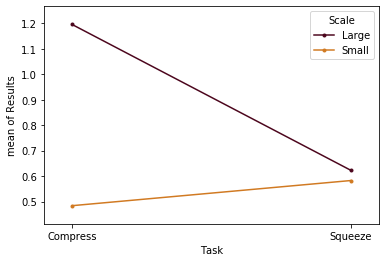

In [86]:
from statsmodels.graphics.factorplots import interaction_plot
plt.figure(figsize = (20,10))

fig = interaction_plot(x=anovaMe_melt['Task'], trace=anovaMe_melt['Scale'], response=anovaMe_melt['Results'], colors=['#4c061d','#d17a22'])
plt.show()

# Check effect of Tasks over Perception

In [87]:
# we will use bioinfokit (v1.0.3 or later) for performing tukey HSD test
# check documentation here https://github.com/reneshbedre/bioinfokit
from bioinfokit.analys import stat
# perform multiple pairwise comparison (Tukey HSD)
# unequal sample size data, tukey_hsd uses Tukey-Kramer test
res = stat()
# for main effect Condition
res.tukey_hsd(df=anovaMe_melt, res_var='Results', xfac_var=['Scale', 'Task'], anova_model='Results~C(Conditions)*C(Scale)*C(Task)')

    
summaryCrossRefBloc = pd.DataFrame()
summaryCrossRefBloc = res.tukey_summary

res.tukey_summary


# output
# Note: p-value 0.001 from tukey_hsd output should be interpreted as <=0.001


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/bioinfokit/analys.py:369: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  (df[xfac_var[1]] == ele2)].mean().loc[res_var]


,group1,group2,Diff,Lower,Upper,q-value,p-value
0,"(Large, Squeeze)","(Large, Compress)",0.572840,-0.115750,1.261429,3.025809,0.141055
1,"(Large, Squeeze)","(Small, Squeeze)",0.039506,-0.649084,0.728096,0.208676,0.900000
2,"(Large, Squeeze)","(Small, Compress)",0.138272,-0.550318,0.826862,0.730368,0.900000
3,"(Large, Compress)","(Small, Squeeze)",0.612346,-0.076244,1.300936,3.234486,0.101443
4,"(Large, Compress)","(Small, Compress)",0.711111,0.022521,1.399701,3.756177,0.039885
5,"(Small, Squeeze)","(Small, Compress)",0.098765,-0.589824,0.787355,0.521691,0.900000


In [88]:
summaryCrossRefBloc

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,"(Large, Squeeze)","(Large, Compress)",0.572840,-0.115750,1.261429,3.025809,0.141055
1,"(Large, Squeeze)","(Small, Squeeze)",0.039506,-0.649084,0.728096,0.208676,0.900000
2,"(Large, Squeeze)","(Small, Compress)",0.138272,-0.550318,0.826862,0.730368,0.900000
3,"(Large, Compress)","(Small, Squeeze)",0.612346,-0.076244,1.300936,3.234486,0.101443
4,"(Large, Compress)","(Small, Compress)",0.711111,0.022521,1.399701,3.756177,0.039885
5,"(Small, Squeeze)","(Small, Compress)",0.098765,-0.589824,0.787355,0.521691,0.900000


In [89]:

for i in range(0, len(summaryCrossRefBloc)):
    if((summaryCrossRefBloc['p-value'].iloc[i] < 0.05) & (summaryCrossRefBloc['p-value'].iloc[i] > 0.01)):
        summaryCrossRefBloc.loc[i, 'Stars'] = '*'
    if((summaryCrossRefBloc['p-value'].iloc[i] < 0.01) & (summaryCrossRefBloc['p-value'].iloc[i] > 0.001)):
        summaryCrossRefBloc.loc[i, 'Stars'] = '**'
    if((summaryCrossRefBloc['p-value'].iloc[i] < 0.001) & (summaryCrossRefBloc['p-value'].iloc[i] > 0.0001)):
        summaryCrossRefBloc.loc[i, 'Stars'] = '***'
    elif(summaryCrossRefBloc['p-value'].iloc[i] < 0.0001):
        summaryCrossRefBloc.loc[i, 'Stars'] = '****'
    else:
        pass

summaryCrossRefBloc = summaryCrossRefBloc[summaryCrossRefBloc['Stars'].isna() == False]
summaryCrossRefBloc = summaryCrossRefBloc[summaryCrossRefBloc['Stars'].isna() == False]

summaryCrossRefBloc

,group1,group2,Diff,Lower,Upper,q-value,p-value,Stars
4,"(Large, Compress)","(Small, Compress)",0.711111,0.022521,1.399701,3.756177,0.039885,*


In [90]:
res = stat()
# for main effect Condition
res.tukey_hsd(df=anovaMe_melt, res_var='Results', xfac_var=['Scale', 'Task'], anova_model='Results~C(Conditions)*C(Scale)*C(Task)')

summaryCrossRefBloc = pd.concat([res.tukey_summary, summaryCrossRefBloc], axis = 0)
summaryCrossRefBloc


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/bioinfokit/analys.py:369: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  (df[xfac_var[1]] == ele2)].mean().loc[res_var]


,group1,group2,Diff,Lower,Upper,q-value,p-value,Stars
0,"(Large, Squeeze)","(Large, Compress)",0.572840,-0.115750,1.261429,3.025809,0.141055,NaN
1,"(Large, Squeeze)","(Small, Squeeze)",0.039506,-0.649084,0.728096,0.208676,0.900000,NaN
2,"(Large, Squeeze)","(Small, Compress)",0.138272,-0.550318,0.826862,0.730368,0.900000,NaN
3,"(Large, Compress)","(Small, Squeeze)",0.612346,-0.076244,1.300936,3.234486,0.101443,NaN
4,"(Large, Compress)","(Small, Compress)",0.711111,0.022521,1.399701,3.756177,0.039885,NaN
5,"(Small, Squeeze)","(Small, Compress)",0.098765,-0.589824,0.787355,0.521691,0.900000,NaN
4,"(Large, Compress)","(Small, Compress)",0.711111,0.022521,1.399701,3.756177,0.039885,*


# Summary

In [91]:

for i in range(0, len(summaryCrossRefBloc)):
    if((summaryCrossRefBloc['p-value'].iloc[i] < 0.05) & (summaryCrossRefBloc['p-value'].iloc[i] > 0.01)):
        summaryCrossRefBloc.loc[i, 'Stars'] = '*'
    if((summaryCrossRefBloc['p-value'].iloc[i] < 0.01) & (summaryCrossRefBloc['p-value'].iloc[i] > 0.001)):
        summaryCrossRefBloc.loc[i, 'Stars'] = '**'
    if((summaryCrossRefBloc['p-value'].iloc[i] < 0.001) & (summaryCrossRefBloc['p-value'].iloc[i] > 0.0001)):
        summaryCrossRefBloc.loc[i, 'Stars'] = '***'
    elif(summaryCrossRefBloc['p-value'].iloc[i] < 0.0001):
        summaryCrossRefBloc.loc[i, 'Stars'] = '****'
    else:
        pass

summaryCrossRefBloc = summaryCrossRefBloc[summaryCrossRefBloc['group1'].isna() == False]
summaryCrossRefBloc = summaryCrossRefBloc[summaryCrossRefBloc['Stars'].isna() == False]
#summaryCrossRefBloc.to_excel('../Jupyter/Results/Signficant_Bloc.xlsx')

summaryCrossRefBloc

,group1,group2,Diff,Lower,Upper,q-value,p-value,Stars
4,"(Large, Compress)","(Small, Compress)",0.711111,0.022521,1.399701,3.756177,0.039885,*
4,"(Large, Compress)","(Small, Compress)",0.711111,0.022521,1.399701,3.756177,0.039885,*


In [101]:
summaryCrossRef = pd.DataFrame()

posthocs = pg.pairwise_ttests(dv='Results', within=['Task', 'Scale'], alpha = 0.05, interaction = True,
                       subject='User', data=anovaMe_melt, correction = True, padjust = 'bonf')
summaryCrossRef = posthocs#[posthocs['Contrast'] == 'Conditions * Obj']
posthocs = pg.pairwise_ttests(dv='Results', within=['Scale', 'Task'], alpha = 0.05, interaction = True,
                       subject='User', data=anovaMe_melt,  correction = True, padjust = 'bonf')
summaryCrossRef = pd.concat([posthocs[posthocs['Contrast'] == 'Scale * Task'], summaryCrossRef], axis = 0)


summaryCrossRef.index = np.arange(0, len(summaryCrossRef))
for i in range(0, len(summaryCrossRef)):
    if((summaryCrossRef['p-corr'].iloc[i] < 0.05) & (summaryCrossRef['p-corr'].iloc[i] > 0.01)):
        summaryCrossRef.loc[summaryCrossRef['p-corr'].index[i], 'Stars'] = '*'
    if((summaryCrossRef['p-corr'].iloc[i] < 0.01) & (summaryCrossRef['p-corr'].iloc[i] > 0.001)):
        summaryCrossRef.loc[summaryCrossRef['p-corr'].index[i], 'Stars'] = '**'
    if((summaryCrossRef['p-corr'].iloc[i] < 0.001) & (summaryCrossRef['p-corr'].iloc[i] > 0.0001)):
        summaryCrossRef.loc[summaryCrossRef['p-corr'].index[i], 'Stars'] = '***'
    elif(summaryCrossRef['p-corr'].iloc[i] < 0.0001):
        summaryCrossRef.loc[summaryCrossRef['p-corr'].index[i], 'Stars'] = '****'
    else:
        pass
    
summaryCrossRef = summaryCrossRef[summaryCrossRef['Contrast'].isna() == False]

#summaryCrossRef = summaryCrossRef[summaryCrossRef['Stars'].isna() == False]

,Contrast,Scale,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges,Task
0,Scale * Task,Large,Compress,Squeeze,True,True,2.311299,14.0,two-sided,0.036558,0.073116,bonf,1.961,0.306693,NaN
1,Scale * Task,Small,Compress,Squeeze,True,True,-0.247364,14.0,two-sided,0.808218,1.000000,bonf,0.27,-0.046073,NaN
2,Task,NaN,Compress,Squeeze,True,True,1.007525,14.0,two-sided,0.330780,NaN,NaN,0.405,0.125852,-
3,Scale,NaN,Large,Small,True,True,1.420694,14.0,two-sided,0.177294,NaN,NaN,0.606,0.197679,-
4,Task * Scale,NaN,Large,Small,True,True,1.658792,14.0,two-sided,0.119384,0.238769,bonf,0.801,0.336364,Compress
5,Task * Scale,NaN,Large,Small,True,True,0.153846,14.0,two-sided,0.879927,1.000000,bonf,0.265,0.020780,Squeeze


In [100]:
#summaryCrossRef.to_excel('../Jupyter/Results/Significant_AllObj.xlsx')
summaryCrossRef

,Contrast,Scale,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges,Task
0,Scale * Task,Large,Compress,Squeeze,True,True,2.311299,14.0,two-sided,0.036558,0.073116,holm,1.961,0.306693,NaN
1,Scale * Task,Small,Compress,Squeeze,True,True,-0.247364,14.0,two-sided,0.808218,0.808218,holm,0.27,-0.046073,NaN
2,Task,NaN,Compress,Squeeze,True,True,1.007525,14.0,two-sided,0.330780,NaN,NaN,0.405,0.125852,-
3,Scale,NaN,Large,Small,True,True,1.420694,14.0,two-sided,0.177294,NaN,NaN,0.606,0.197679,-
4,Task * Scale,NaN,Large,Small,True,True,1.658792,14.0,two-sided,0.119384,0.238769,holm,0.801,0.336364,Compress
5,Task * Scale,NaN,Large,Small,True,True,0.153846,14.0,two-sided,0.879927,0.879927,holm,0.265,0.020780,Squeeze


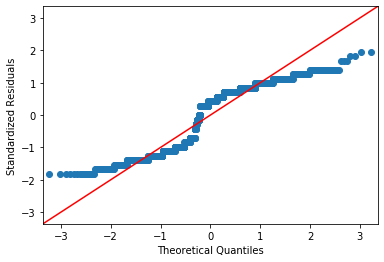

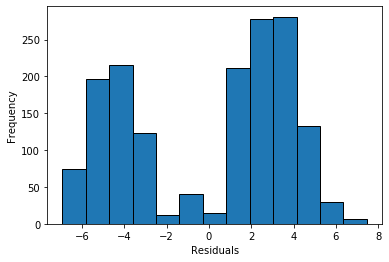

0.8851364254951477 4.712304855845093e-33


In [102]:
# QQ-plot
import statsmodels.api as sm
import matplotlib.pyplot as plt
# res.anova_std_residuals are standardized residuals obtained from two-way ANOVA (check above)
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

# histogram
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

# Shapiro-Wilk test
import scipy.stats as stats
w, pvalue = stats.shapiro(res.anova_model_out.resid)
print(w, pvalue)
# need to have p non significant to show equal variances

#The ANOVA model is remarkably robust to the violation of normality assumption, which means that it will have a 
# non-significant effect on Type I error rate and p values will remain reliable as long as there are no outliers

In [105]:
# if from normal distribution after shapiro's test
res = stat()

res.bartlett(df=anovaMe_melt, res_var='Results', xfac_var=['Task', 'Scale'])
res.bartlett_summary

,Parameter,Value
0,Test statistics (T),0.8127
1,Degrees of freedom (Df),3.0000
2,p value,0.8464


In [106]:
# if you have  a stacked table, you can use bioinfokit v1.0.3 or later for the Levene's test
# if not from a normal distribution
from bioinfokit.analys import stat 
res = stat()
res.levene(df=anovaMe_melt, res_var='Results', xfac_var=['Task', 'Scale'])
    
res.levene_summary

# output
# need to have p non significant to show equal variances

,Parameter,Value
0,Test statistics (W),2.7087
1,Degrees of freedom (Df),3.0000
2,p value,0.0438
